In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [9]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    
    # num_episodes만큼 episode를 생성하여 학습
    for i in range(num_episodes):     
        
        # 1. episode 생성 및 리스트에 저장
        episode_list = []
        state = env.reset()
        t = 0
        while True:
            next_state, reward, done, info = env.step(policy(state))
            episode_list.append((state, policy(state), reward))
            t+=1

            if done or t == 100:
                break # 턴이 100번 진행되었거나, 게임이 종료될 때 까지 episode를 진행
            state = next_state

        # 2. 저장된 episode list를 통해 V 업데이트
        G = 0
        # from t=T-1 to t=0, update value function
        for step in range(len(episode_list)-1,-1,-1):
            # G : total discounted reward from current state
            G = discount_factor * G + episode_list[step][2]
            # add G to returns of current state
            returns_sum[episode_list[step][0]] += G
            returns_count[episode_list[step][0]] += 1
            # V(current state) = expectation of G
            V[episode_list[step][0]] = returns_sum[episode_list[step][0]] / returns_count[episode_list[step][0]]


    return V    

In [10]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

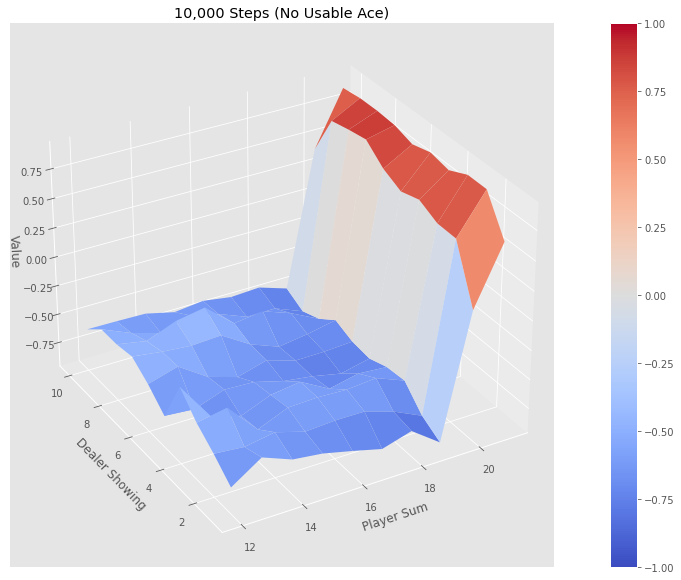

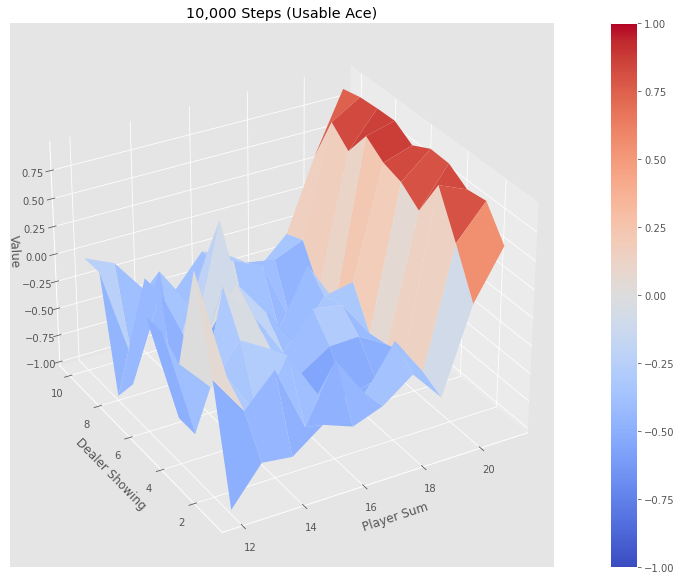

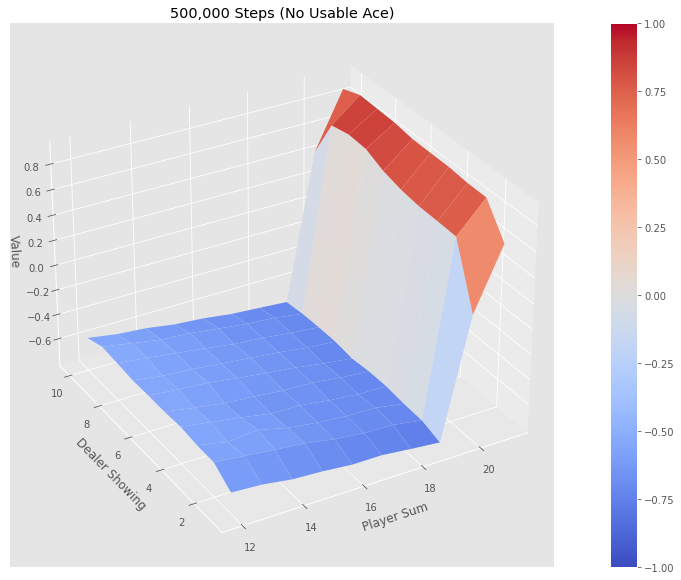

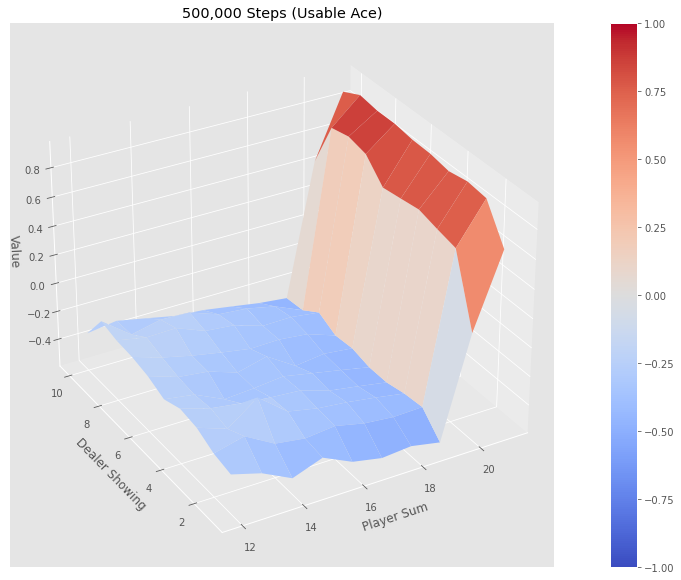

In [11]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")